# Logistic Regression to predict Titanic Survivors

Hi ! Today we will work on the [Titanic Data Set](https://www.kaggle.com/c/titanic) and predict survivors of the tragedy using Logistic Regression model.

We will try to predict a classification - survived or deceased. 

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Getting the Data

We will start by reading the titanic_train.csv into a Pandas DataFrame. We have 2 csv files titanic_train(Training Data) and titanic_test(Test Data).  
First we read the training data.

In [2]:
titanic_train = pd.read_csv('titanic_train.csv')

In [3]:
titanic_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## 3. Data Cleaning

As we know its a good habit to **check for Null/NaN values** in our data set and deal with them appropriately before moving on to EDA and predictions.

In [4]:
titanic_train.isnull().head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


As we can see there are many Null/NaN values in our dataset under the **'Age' and 'Cabin'** columns.  
Hence we need to do some data cleaning before we move further.  
Let's plot a heatmap which shows where in our dataset we have NaN values.

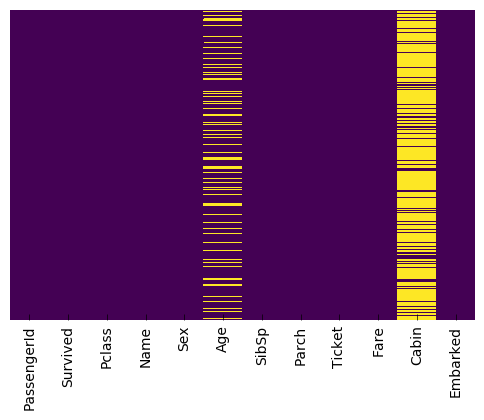

In [5]:
sns.heatmap(titanic_train.isnull(),cmap='viridis',yticklabels=False,cbar=False)

One way of dealing with such issues is to either drop the whole column altogether or fill in some appropriate values for the missing ones. The missing values in Age column are comparatively smaller and can be fixed by some sort of imputation.  
However, there are too many missing values in Cabin column to be taken care of. Also if we take a look at the type of data in it, it contains strings as well which is not be helpful in Logistic Regression for us. Either we can opt to drop this column or maybe create a new column 'Cabin Known': 0 or 1.

We can fill in the missing age values by taking the mean of the Age column. However a better way to do this would be take mean age as per passenger class. We will find the mean age by passenger class using a boxplot as below:

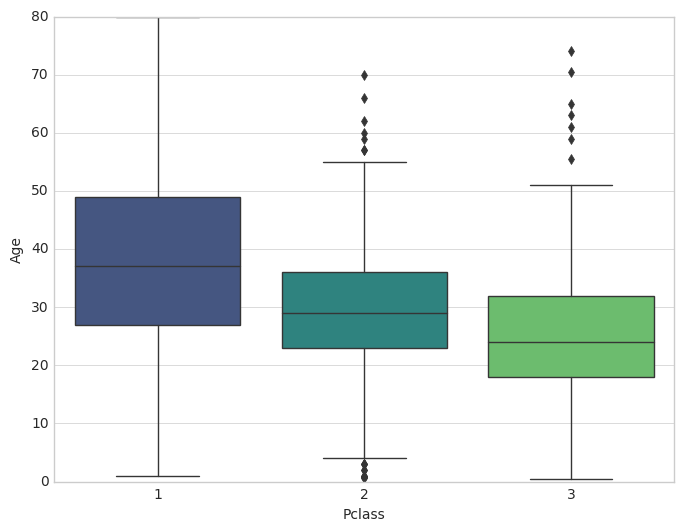

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass',y='Age',data=titanic_train,palette='viridis')

From the above plot we can say that the mean age for :  
Pclass 1 is 37  
Pclass 2 is 29  
Pclass 3 is 24  
These values are purely approximates, we could get a more accurate value by doing arithmetic on the column.
One conclusion from the above plot is that wealthier passengers were mostly elder to the other class passengers. Makes sense ! It takes quiet some time to get wealthy.

In [7]:
def age_imputation(columns):
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now we will apply the above function.

In [8]:
titanic_train['Age'] = titanic_train[['Age','Pclass']].apply(age_imputation,axis=1)

Now let's verify our changes by plotting the earlier heatmap once again.

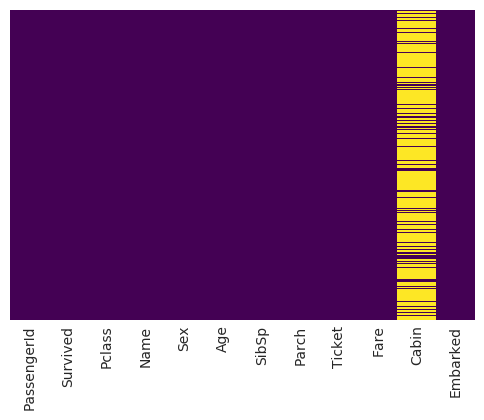

In [9]:
sns.heatmap(titanic_train.isnull(),cmap='viridis',yticklabels=False,cbar=False)

Great ! Seems like we no longer have any NaNs in the Age column. So now we move on and add the new 'Cabin Known' column using the Cabin column.

In [10]:
def cabin_imputation(columns):
    Cabin = columns[0]
    if pd.isnull(Cabin):
        return 0
    else:
        return 1

In [11]:
titanic_train['Cabin'] = titanic_train[['Cabin']].apply(cabin_imputation,axis=1)

In [12]:
titanic_train.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin Known', 'Embarked']

Now let's check again how our heatmap looks.

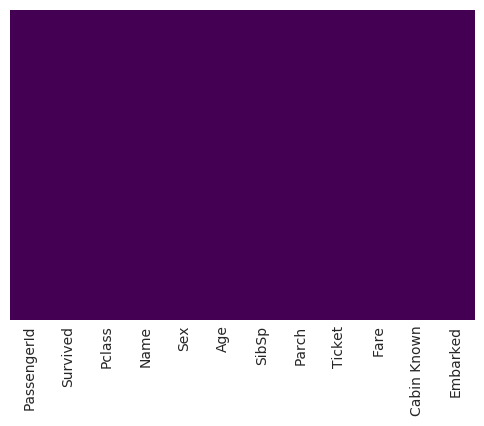

In [13]:
sns.heatmap(titanic_train.isnull(),cmap='viridis',yticklabels=False,cbar=False)

Great ! Now we see a solid color which indicates we dont have any more missing values.

## 4. EDA

NOTE: This EDA is carried out on the training data which is not the complete data set as the test.csv file has not been imported yet. 

In [14]:
sns.set_style('whitegrid')

#### 1. Let's plot a basic barplot showing counts of people who survived and people who didnt.

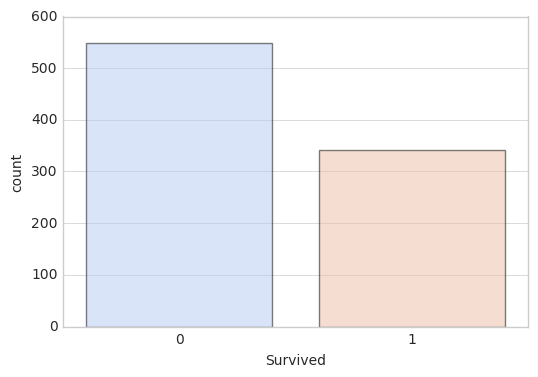

In [15]:
sns.countplot(x='Survived',data=titanic_train,palette='coolwarm',alpha=0.5)

Looks like around 550 people died and 340 survived.

#### 2. Now let's plot the above plot but split it across the sex column.

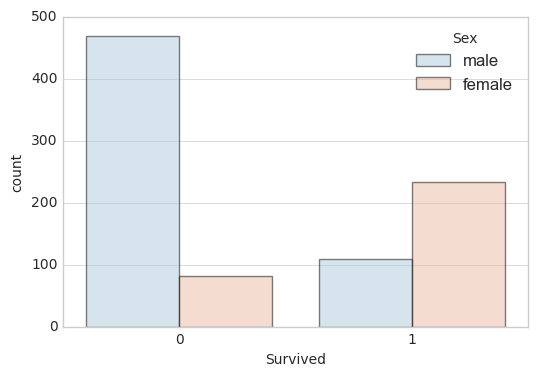

In [16]:
sns.countplot(x='Survived',data=titanic_train,hue='Sex',palette='RdBu_r',alpha=0.5)

Amongst the passengers who died, majority were men while twice the number of women than men survived.

#### 3. Now let's see survival stats as per Passenger Class.

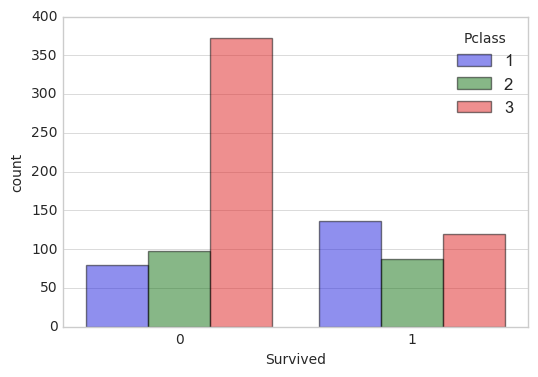

In [17]:
sns.countplot(x='Survived',data=titanic_train,hue='Pclass',alpha=0.5)

As we can see majority of the 3rd class passengers didnt survive.

#### 4. Now let's see the age distribution of passengers onboard.

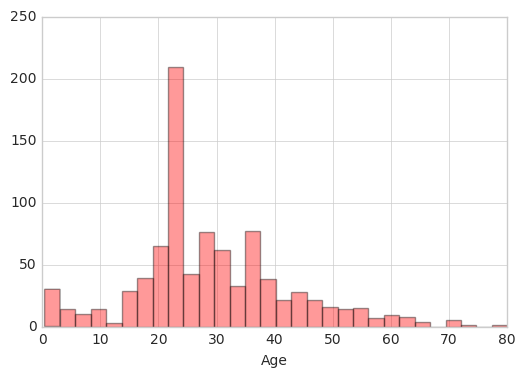

In [18]:
sns.distplot(titanic_train['Age'],kde=False,color='red',bins=30)

Looks like we had quiet a few toddlers,very few senior citizens and vast number of middle aged men and women onboard.

#### 5. Let's now look at the fair distribution across all passengers.

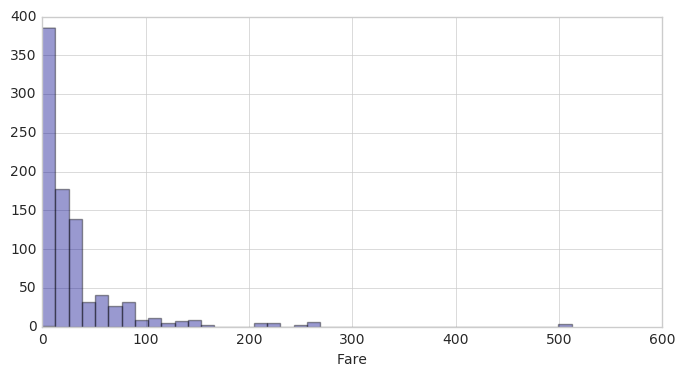

In [19]:
plt.figure(figsize=(8,4))
sns.distplot(titanic_train['Fare'],bins=40,color='darkblue',kde=False)

Looks like most of the fare distribution is in the range 0-100. Makes sense , as we saw there were majority of 3rd class passengers on board. 

## 5. Converting Categorical Values

Looking at our dataset we can say that 'Sex' and 'Embarked' are categorical columns. We need to convert them to dummy variables using pandas otherwise our machine learning algorithm wont be able to take thsoe features as inputs.

In [20]:
sex = pd.get_dummies(titanic_train['Sex'],drop_first=True)
embark = pd.get_dummies(titanic_train['Embarked'],drop_first=True)

In [21]:
titanic_train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [22]:
titanic_train = pd.concat([titanic_train,sex,embark],axis=1)

In [23]:
titanic_train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin Known,male,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,1,0.0,0.0,0.0


As we can see the 'Sex' column has been dropped and we have added a 'male' column which has 1 if the passenger is male and 0 otherwise.  
Similarly we have dropped the 'Embarked' column and instead used the 'Q' and 'S' columns.  
NOTE: We have dropped 'Name' and 'Ticket' column too as they contain text data and would need further feature engineering to act as input to our model.(currently out of scope)

Great! Now our model is ready to train on this data.

## 6. Building the Logistic Regression model

Since we have different train and test files we do not need to use train_test_split.

In [24]:
X_train = titanic_train.drop('Survived',axis=1)

In [25]:
y_train = titanic_train['Survived']

### Readying test data

In [26]:
titanic_test = pd.read_csv('titanic_test.csv')

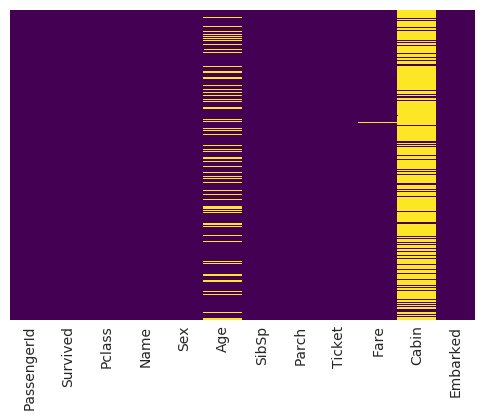

In [27]:
sns.heatmap(titanic_test.isnull(),cmap='viridis',yticklabels=False,cbar=False)

In [28]:
titanic_test.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,1098.224299,0.467290,40.918367,0.476636,0.383178,94.280297
2,1117.935484,0.322581,28.777500,0.376344,0.344086,22.202104
3,1094.178899,0.330275,24.027945,0.463303,0.417431,12.459678


In [29]:
def fare_imputation(columns):
    Fare = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Fare):

        if Pclass == 1:
            return 95

        elif Pclass == 2:
            return 23

        else:
            return 13

    else:
        return Fare

In [30]:
#Age imputation
titanic_test['Age'] = titanic_test[['Age','Pclass']].apply(age_imputation,axis=1)
#Cabin imputation
titanic_test['Cabin'] = titanic_test[['Cabin']].apply(cabin_imputation,axis=1)
titanic_test.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin Known', 'Embarked']
#Fare imputation
titanic_test['Fare'] = titanic_test[['Fare','Pclass']].apply(fare_imputation,axis=1)

In [31]:
sex = pd.get_dummies(titanic_test['Sex'],drop_first=True)
embark = pd.get_dummies(titanic_test['Embarked'],drop_first=True)

In [32]:
titanic_test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [33]:
titanic_test = pd.concat([titanic_test,sex,embark],axis=1)

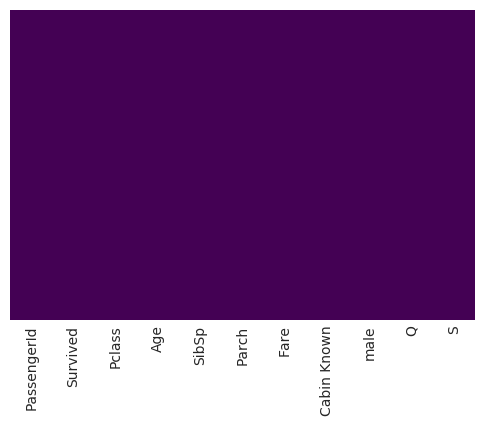

In [34]:
sns.heatmap(titanic_test.isnull(),cmap='viridis',yticklabels=False,cbar=False)

Looks like our test data has now been cleaned and ready!

In [35]:
X_test = titanic_test.drop('Survived',axis=1)

In [36]:
y_test = titanic_test['Survived']

## 7. Training Model and Predicting

In [37]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [38]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
predictions = logmodel.predict(X_test)

Let's now evaluate the model we built

## 8. Evaluation

We can check precision,recall,f1-score using classification report!

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.97      0.92      0.94       266
          1       0.87      0.95      0.91       152

avg / total       0.93      0.93      0.93       418



As seen from the classification report, the model classifies **Survivors** with **87% accuracy** and **Deceased** with **97% accuracy**.  
The overall model accuracy is 93%

In [42]:
print(confusion_matrix(y_test,predictions))

[[245  21]
 [  8 144]]


In [43]:
submission_df = pd.DataFrame({'PassengerId':X_test['PassengerId'],'Survived':predictions})

In [44]:
submission_df.to_csv("gender_submission.csv")

-------------------------------------------------

Earlier we didnt consider Passenger class as a categorical value. Now let's do that and see if it changes anything.

In [51]:
titanic_train.head(2)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin Known,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,0,1.0,0.0,1.0,0.0,1.0
1,2,1,38.0,1,0,71.2833,1,0.0,0.0,0.0,0.0,0.0


In [50]:
#Do it for training data
pclass = pd.get_dummies(titanic_train['Pclass'],drop_first=True)
titanic_train.drop(['Pclass'],axis=1,inplace=True)
titanic_train = pd.concat([titanic_train,pclass],axis=1)

In [52]:
#Do it for test data
pclass = pd.get_dummies(titanic_test['Pclass'],drop_first=True)
titanic_test.drop(['Pclass'],axis=1,inplace=True)
titanic_test = pd.concat([titanic_test,pclass],axis=1)

In [53]:
X_train = titanic_train.drop('Survived',axis=1)
y_train = titanic_train['Survived']
X_test = titanic_test.drop('Survived',axis=1)
y_test = titanic_test['Survived']

In [54]:
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [55]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.96      0.91      0.94       266
          1       0.86      0.94      0.90       152

avg / total       0.93      0.92      0.92       418



As we can see , the precision has remained more or less the same.  
To make the model better we can add more features into our input:-  
    1. Cabin info might help in a way that some cabins might be higher up the deck which may affect survival.
    2. The person's title (Mr,Dr,Mrs etc) might give us some insights as well.

# End . Thank You !